In [32]:
import pandas as pd
import matplotlib.pyplot as plt

resultsdf = pd.read_csv('http://128.198.162.191/dataFiles/OLYMPICS/olympics_1896-2024.csv')

In [33]:
resultsdf.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,EventType,Medal
0,2024,Paris,Cycling Road,Men Individual Time Trial,Evenepoel Remco,Belgium,Male,Athlete,Gold
1,2024,Paris,Cycling Road,Men Individual Time Trial,Ganna Filippo,Italy,Male,Athlete,Silver
2,2024,Paris,Cycling Road,Men Individual Time Trial,Van Aert Wout,Belgium,Male,Athlete,Bronze
3,2024,Paris,Cycling Road,Women Individual Time Trial,Brown Grace,Australia,Female,Athlete,Gold
4,2024,Paris,Cycling Road,Women Individual Time Trial,Henderson Anna,Great Britain,Female,Athlete,Silver


In [34]:
resultsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24012 entries, 0 to 24011
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        24012 non-null  int64 
 1   City        24012 non-null  object
 2   Sport       24012 non-null  object
 3   Discipline  24012 non-null  object
 4   Athlete     20388 non-null  object
 5   Country     24012 non-null  object
 6   Gender      24012 non-null  object
 7   EventType   24012 non-null  object
 8   Medal       24012 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


# Let's calculate the number of medals won by Country

In [35]:
medalsCountry = resultsdf.groupby('Country')['Medal'].count().sort_values(ascending=False)

medalsCountry

Country
United States of America    3424
Germany                     1280
Soviet Union                1272
Great Britain               1207
France                      1139
                            ... 
Paraguay                       1
Guyana                         1
Iraq                           1
Samoa                          1
Sudan                          1
Name: Medal, Length: 162, dtype: int64

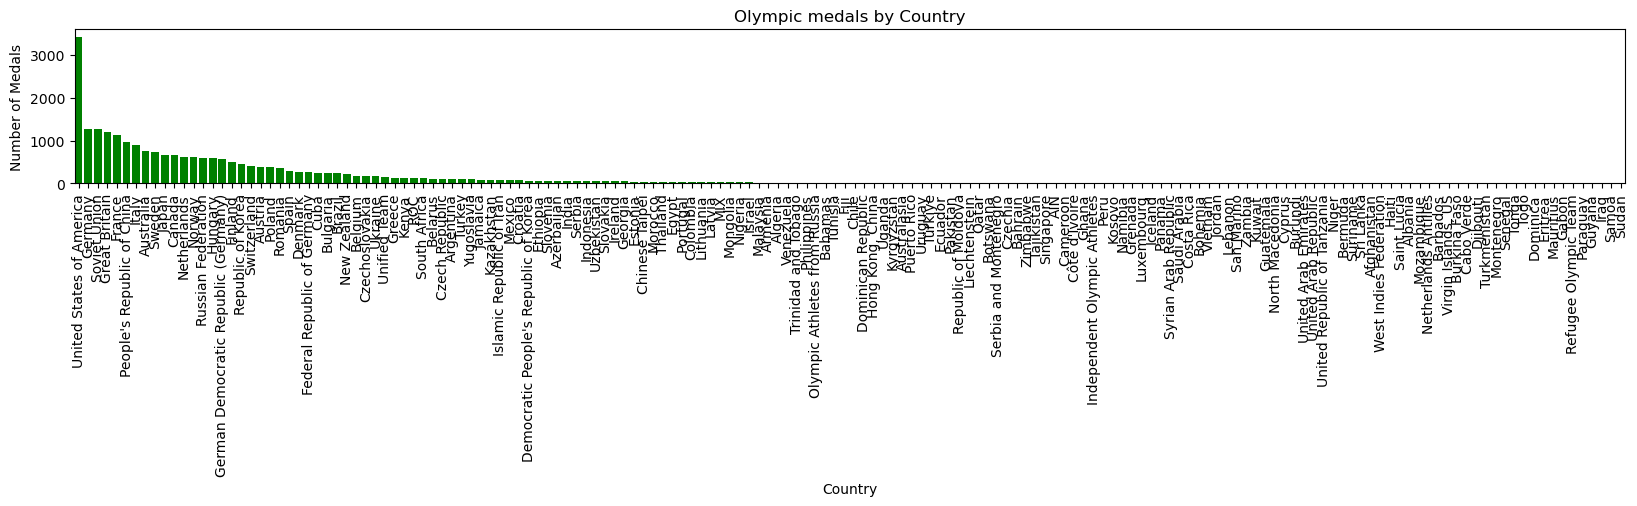

In [36]:
# Format the visualization size
plt.figure(figsize=(20,2))

# Format a bar chart and pass the 'X' and 'Y' values, color, and labels
plt.bar(medalsCountry.index, medalsCountry.values, color='green')

plt.title("Olympic medals by Country")
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)

plt.margins(x=0)

plt.show()

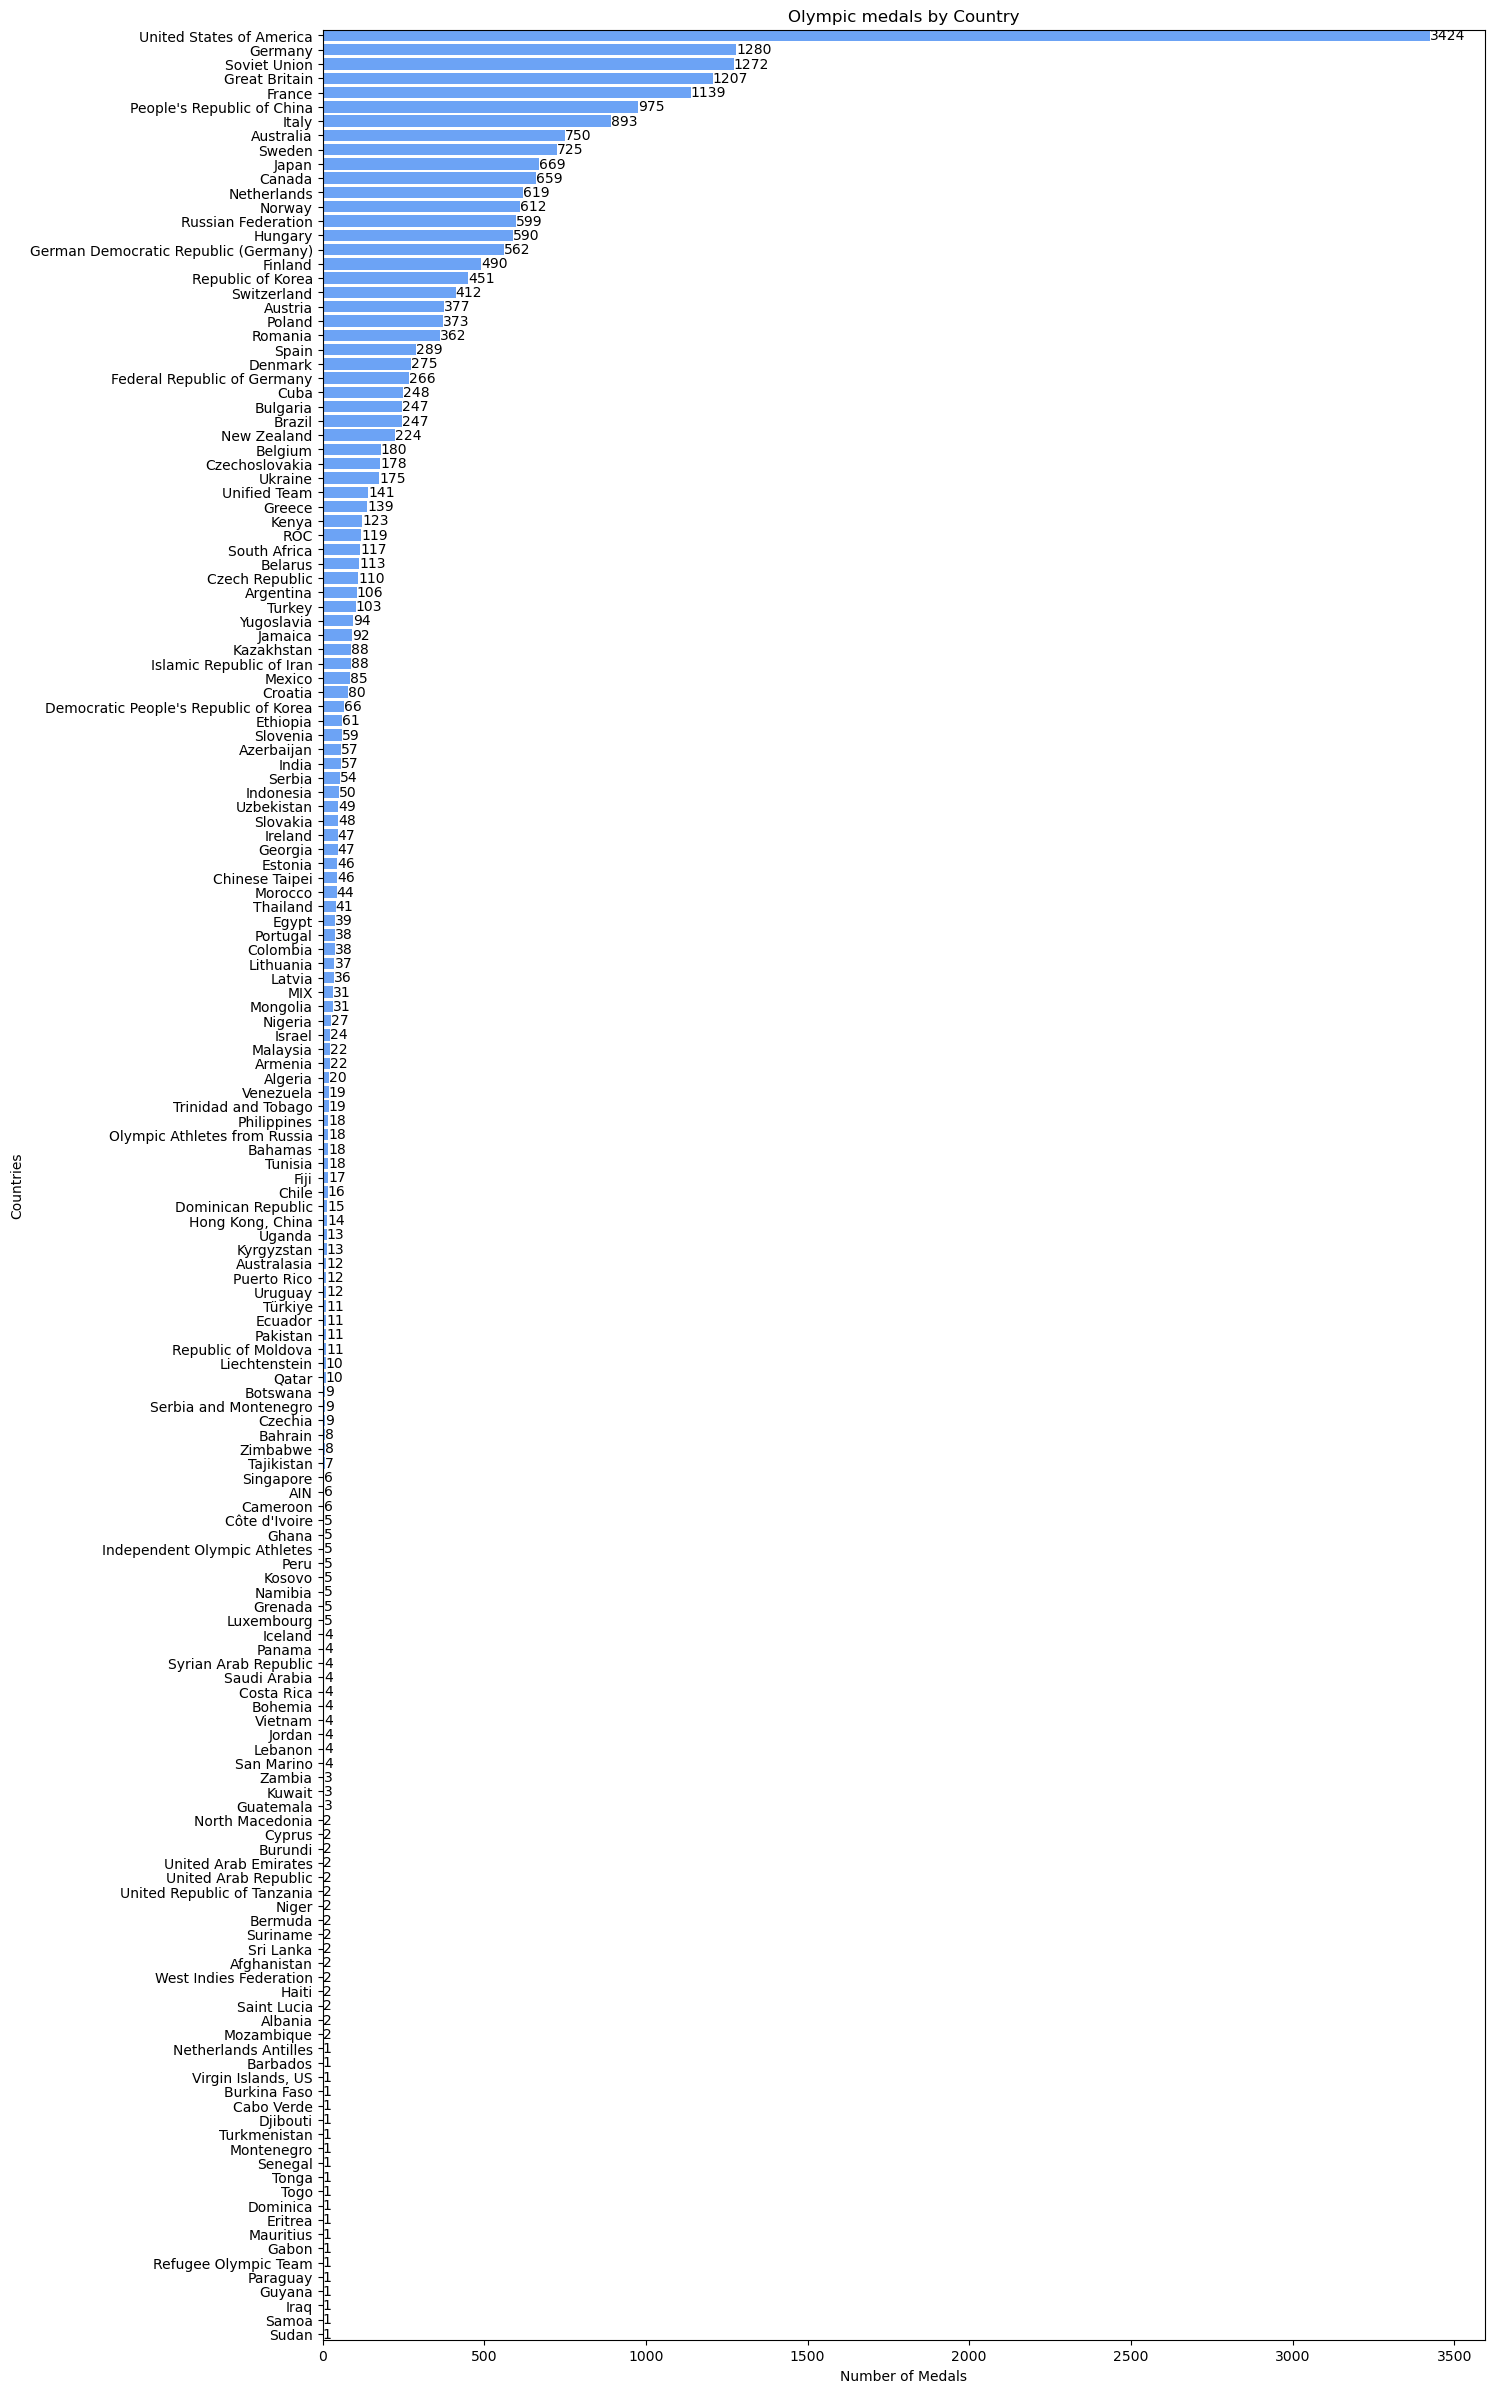

In [37]:
plt.figure(figsize=(15,30))

# Format our chart data
plt.barh(medalsCountry.index, medalsCountry.values, color='#6ca3f5')

plt.title('Olympic medals by Country')
plt.xlabel('Number of Medals')
plt.ylabel('Countries')
plt.margins(y=0)

plt.gca().invert_yaxis() # GCA stands for get current axis and allows us to invert a specific axis. 

# To include label values on each bar we need to loop through the dataframe.
bars = plt.barh(medalsCountry.index, medalsCountry.values, color = '#6ca3f5')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
    f'{bar.get_width():.0f}',
    va='center') # va stands for vertical align.


plt.show()

# Pie Chart

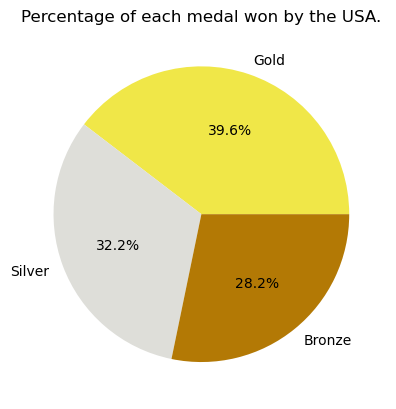

In [41]:
# Let's filter our data for US only and the type of medals
usResults = resultsdf[resultsdf['Country']== 'United States of America']

# Calculate the number of Gold, Silver, and Bronze medals
medalCounts = usResults['Medal'].value_counts()

# Define the custom colors for our pie chart
colors = ['#f0e748', '#deded9', '#b37905']

# Create our pie chart
plt.pie(medalCounts.values, labels=medalCounts.index, autopct='%1.1f%%', colors=colors)

plt.title("Percentage of each medal won by the USA.")

plt.show()

# Line chart example

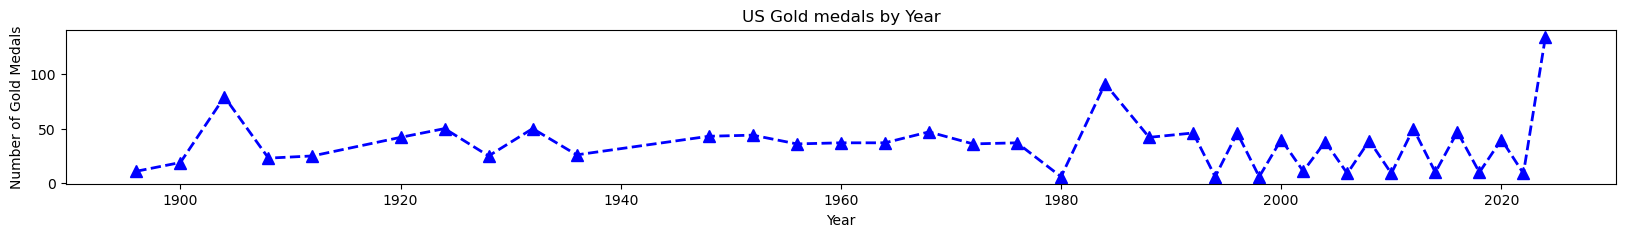

In [39]:
# Let's look at US gold medals only
usGold = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Gold')]

# Group the data to count the number of medals
usGoldYr = usGold.groupby('Year')['Medal'].count()

# Create the chart
plt.figure(figsize=(20,2))

# Choose the line and markers to display in the line chart
plt.plot(usGoldYr.index, usGoldYr.values, color='b', linestyle='--', marker='^', linewidth=2, markersize=8)

# Basics of the chart
plt.title('US Gold medals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.show()

## Different colors and values for different lines.

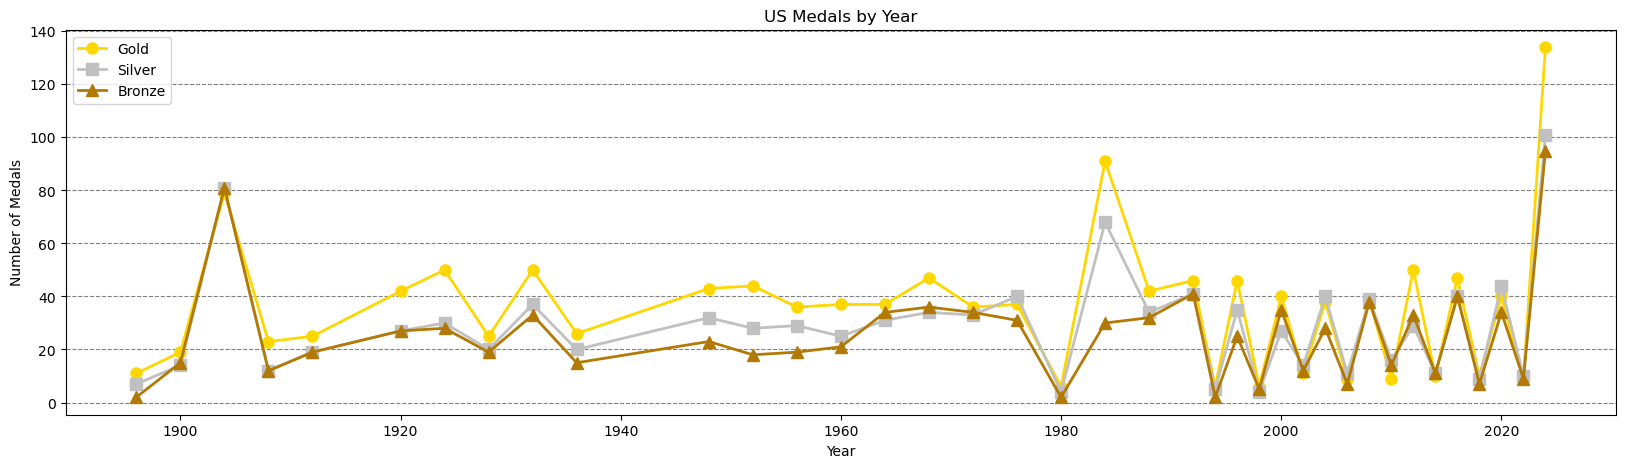

In [40]:
usGold = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Gold')]
usSilver = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Silver')]
usBronze = resultsdf[(resultsdf.Country == 'United States of America') & (resultsdf.Medal == 'Bronze')]


# Group our data by each medal type
usGoldYr = usGold.groupby('Year')['Medal'].count()
usSilverYr = usSilver.groupby('Year')['Medal'].count()
usBronzeYr = usBronze.groupby('Year')['Medal'].count()

# Create our chart
plt.figure(figsize=(20,5))

# Plot a line for each dataframe
plt.plot(usGoldYr.index, usGoldYr.values, color='gold', linestyle='-', marker='o', linewidth=2, markersize=8, label='Gold')
plt.plot(usSilverYr.index, usSilverYr.values, color='silver', linestyle='-', marker='s', linewidth=2, markersize=8, label='Silver')
plt.plot(usBronzeYr.index, usBronzeYr.values, color='#b37905', linestyle='-', marker='^', linewidth=2, markersize=8, label='Bronze')

plt.title('US Medals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend()

# Let's add Y axis grid lines
plt.grid(axis='y', linestyle='--', color='gray')


# Scatterplot

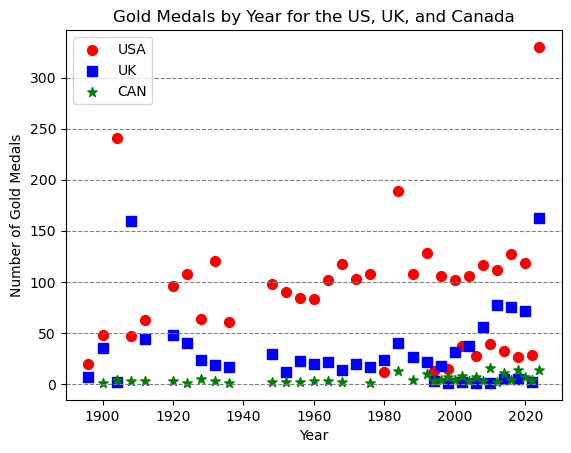

In [43]:
# Let's compare results for some countries

medalsGold = resultsdf[(resultsdf.Country =='United States of America') |
                       (resultsdf.Country == 'Sweden') |
                       (resultsdf.Country == 'Great Britain') |
                       (resultsdf.Country == 'Canada') &
                       (resultsdf.Medal == 'Gold')]

# Group our data by Year and Country and count the medals
medalsByYrCountry = medalsGold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')

# Group by year and Country
medalsByYr = medalsGold.groupby('Year')['Medal'].count()

# Create our plot
medalsPivot = medalsByYrCountry.pivot(index='Year', columns='Country', values='Gold Medals')

# Create the scatter plot
plt.scatter(medalsPivot.index, medalsPivot['United States of America'], label='USA', color='red', marker='o', s=50)
plt.scatter(medalsPivot.index, medalsPivot['Great Britain'], label='UK', color='blue', marker='s', s=50)
plt.scatter(medalsPivot.index, medalsPivot['Canada'], label='CAN', color='green', marker='*', s=50)

plt.title('Gold Medals by Year for the US, UK, and Canada')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.legend()

plt.grid(axis='y', linestyle='--', color='gray')

# Seaborn


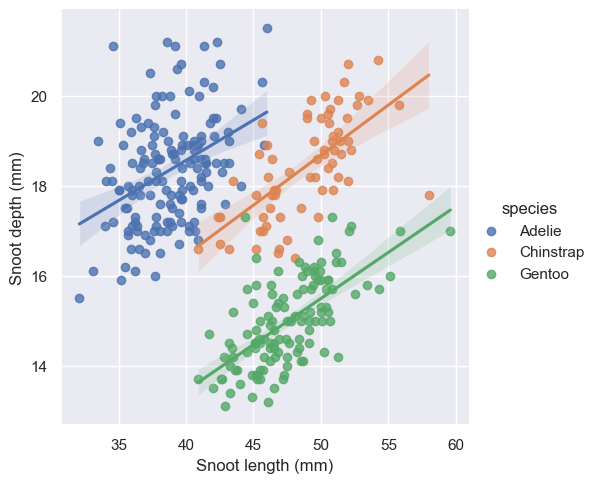

In [44]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [45]:
import seaborn as sns

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [46]:
dfCars = sns.load_dataset('car_crashes')

dfCars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


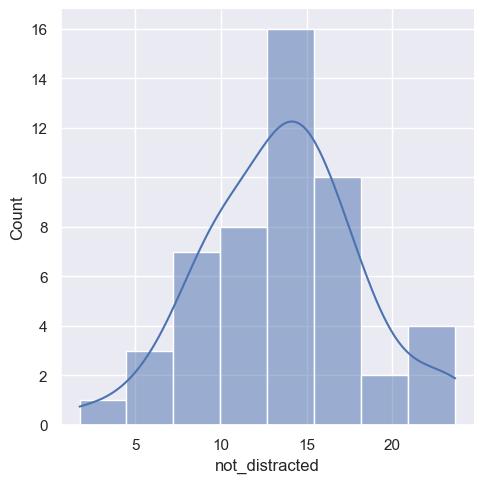

In [47]:
sns.displot(dfCars['not_distracted'], kde=True)

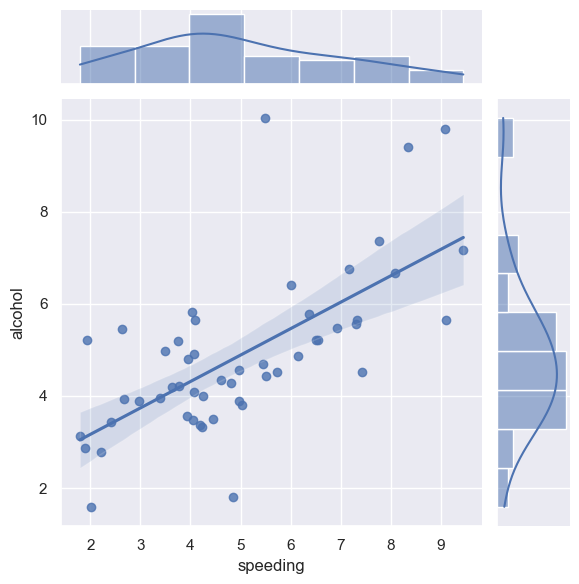

In [48]:
sns.jointplot(x='speeding', y='alcohol', data=dfCars, kind='reg')

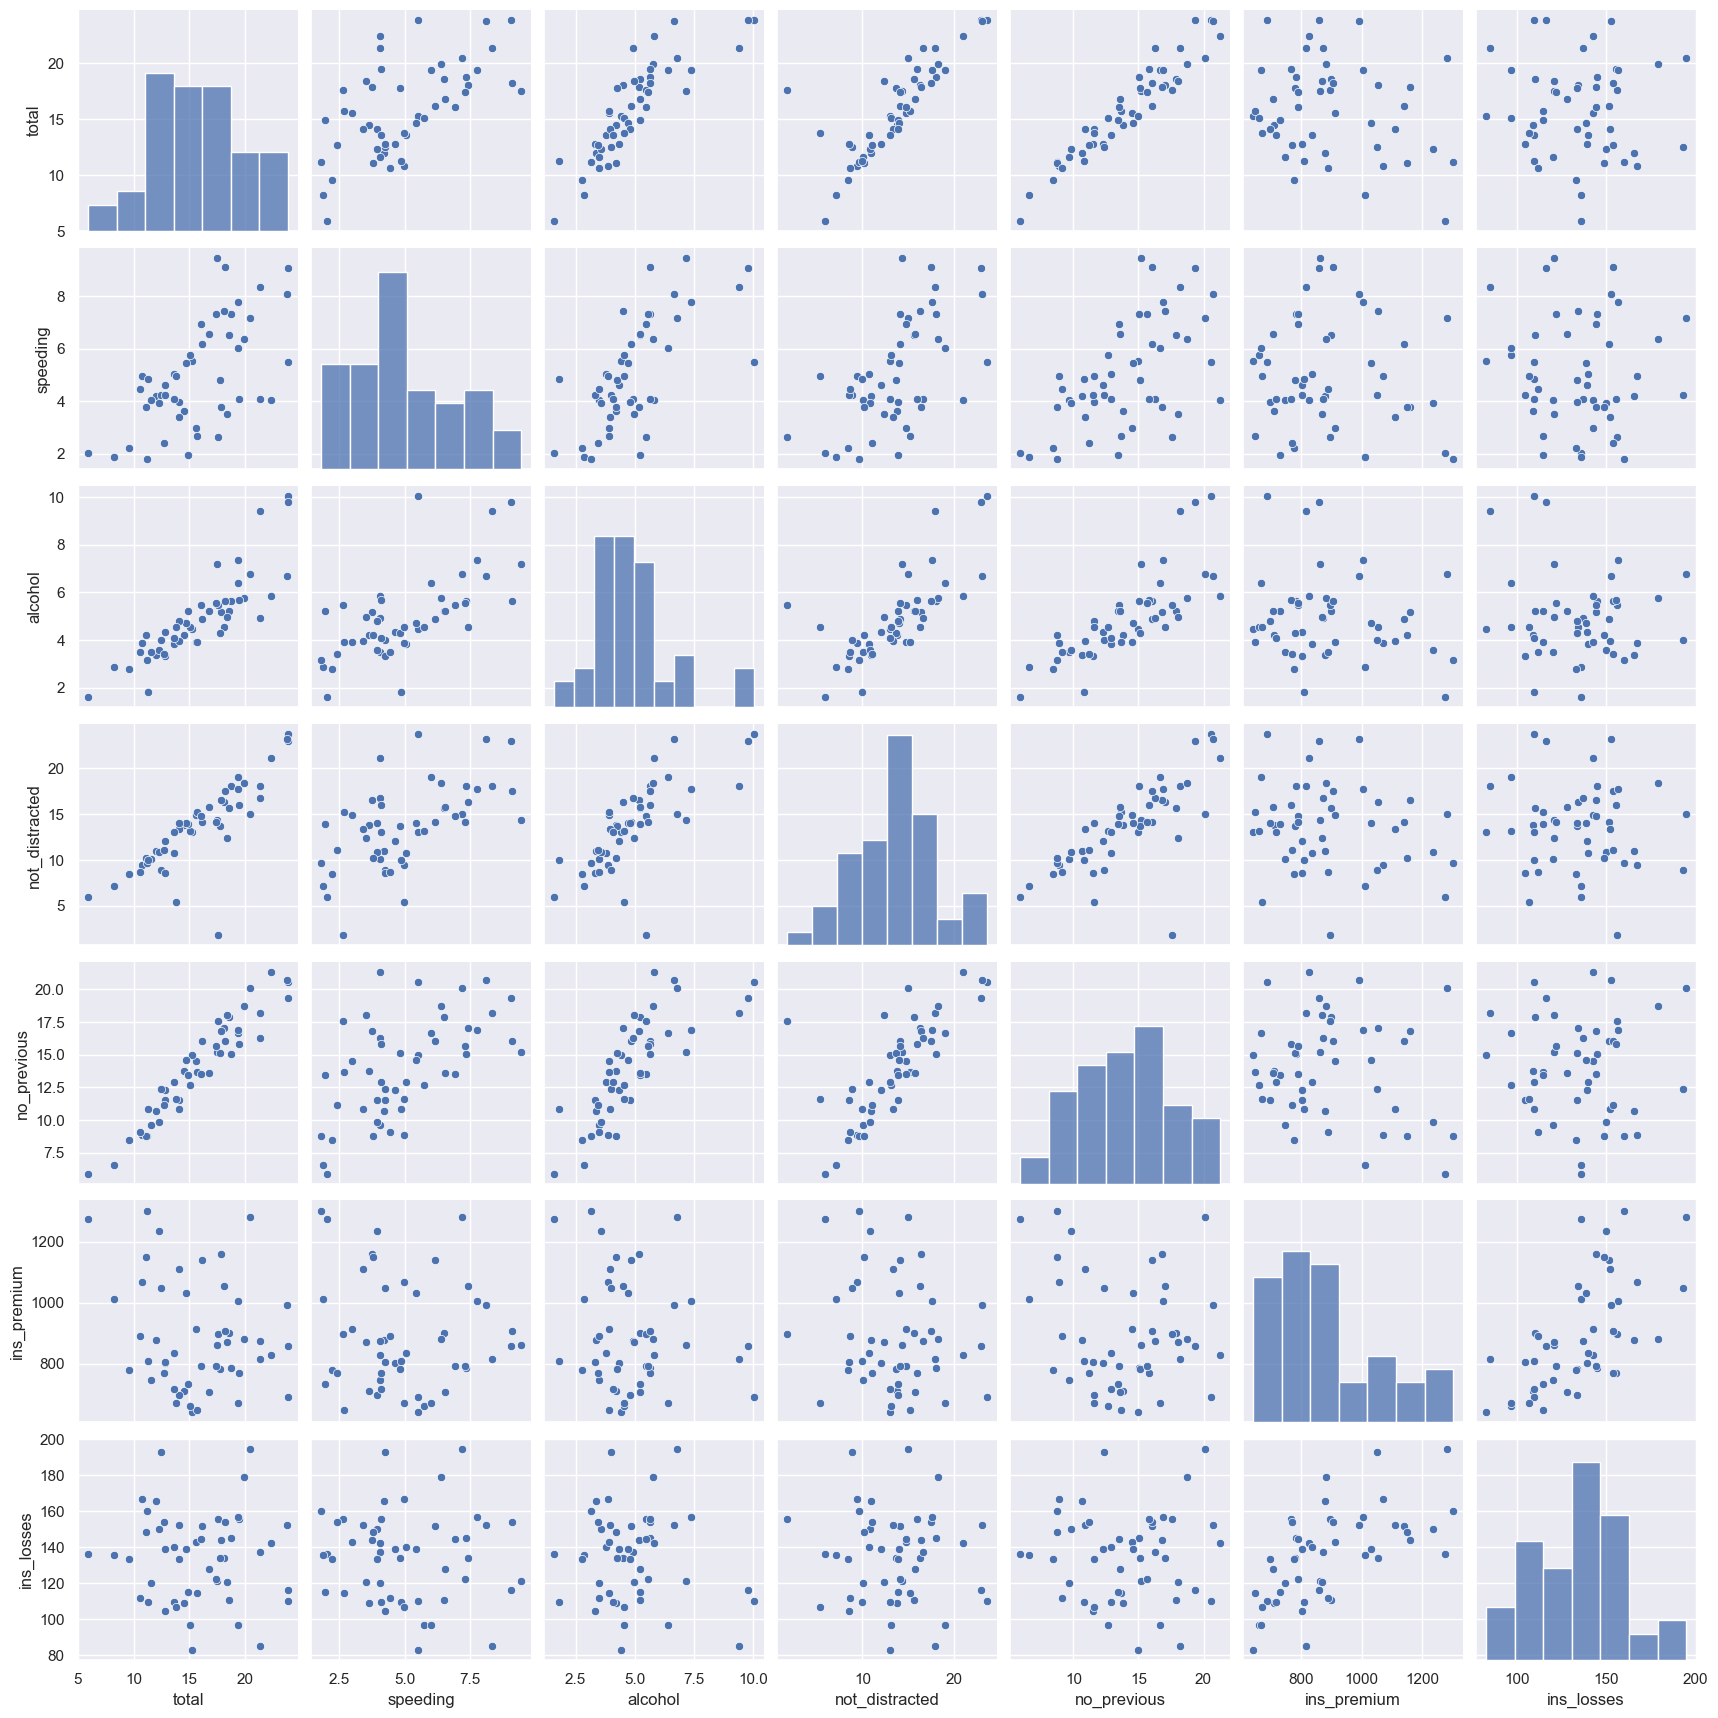

In [49]:
sns.pairplot(dfCars)

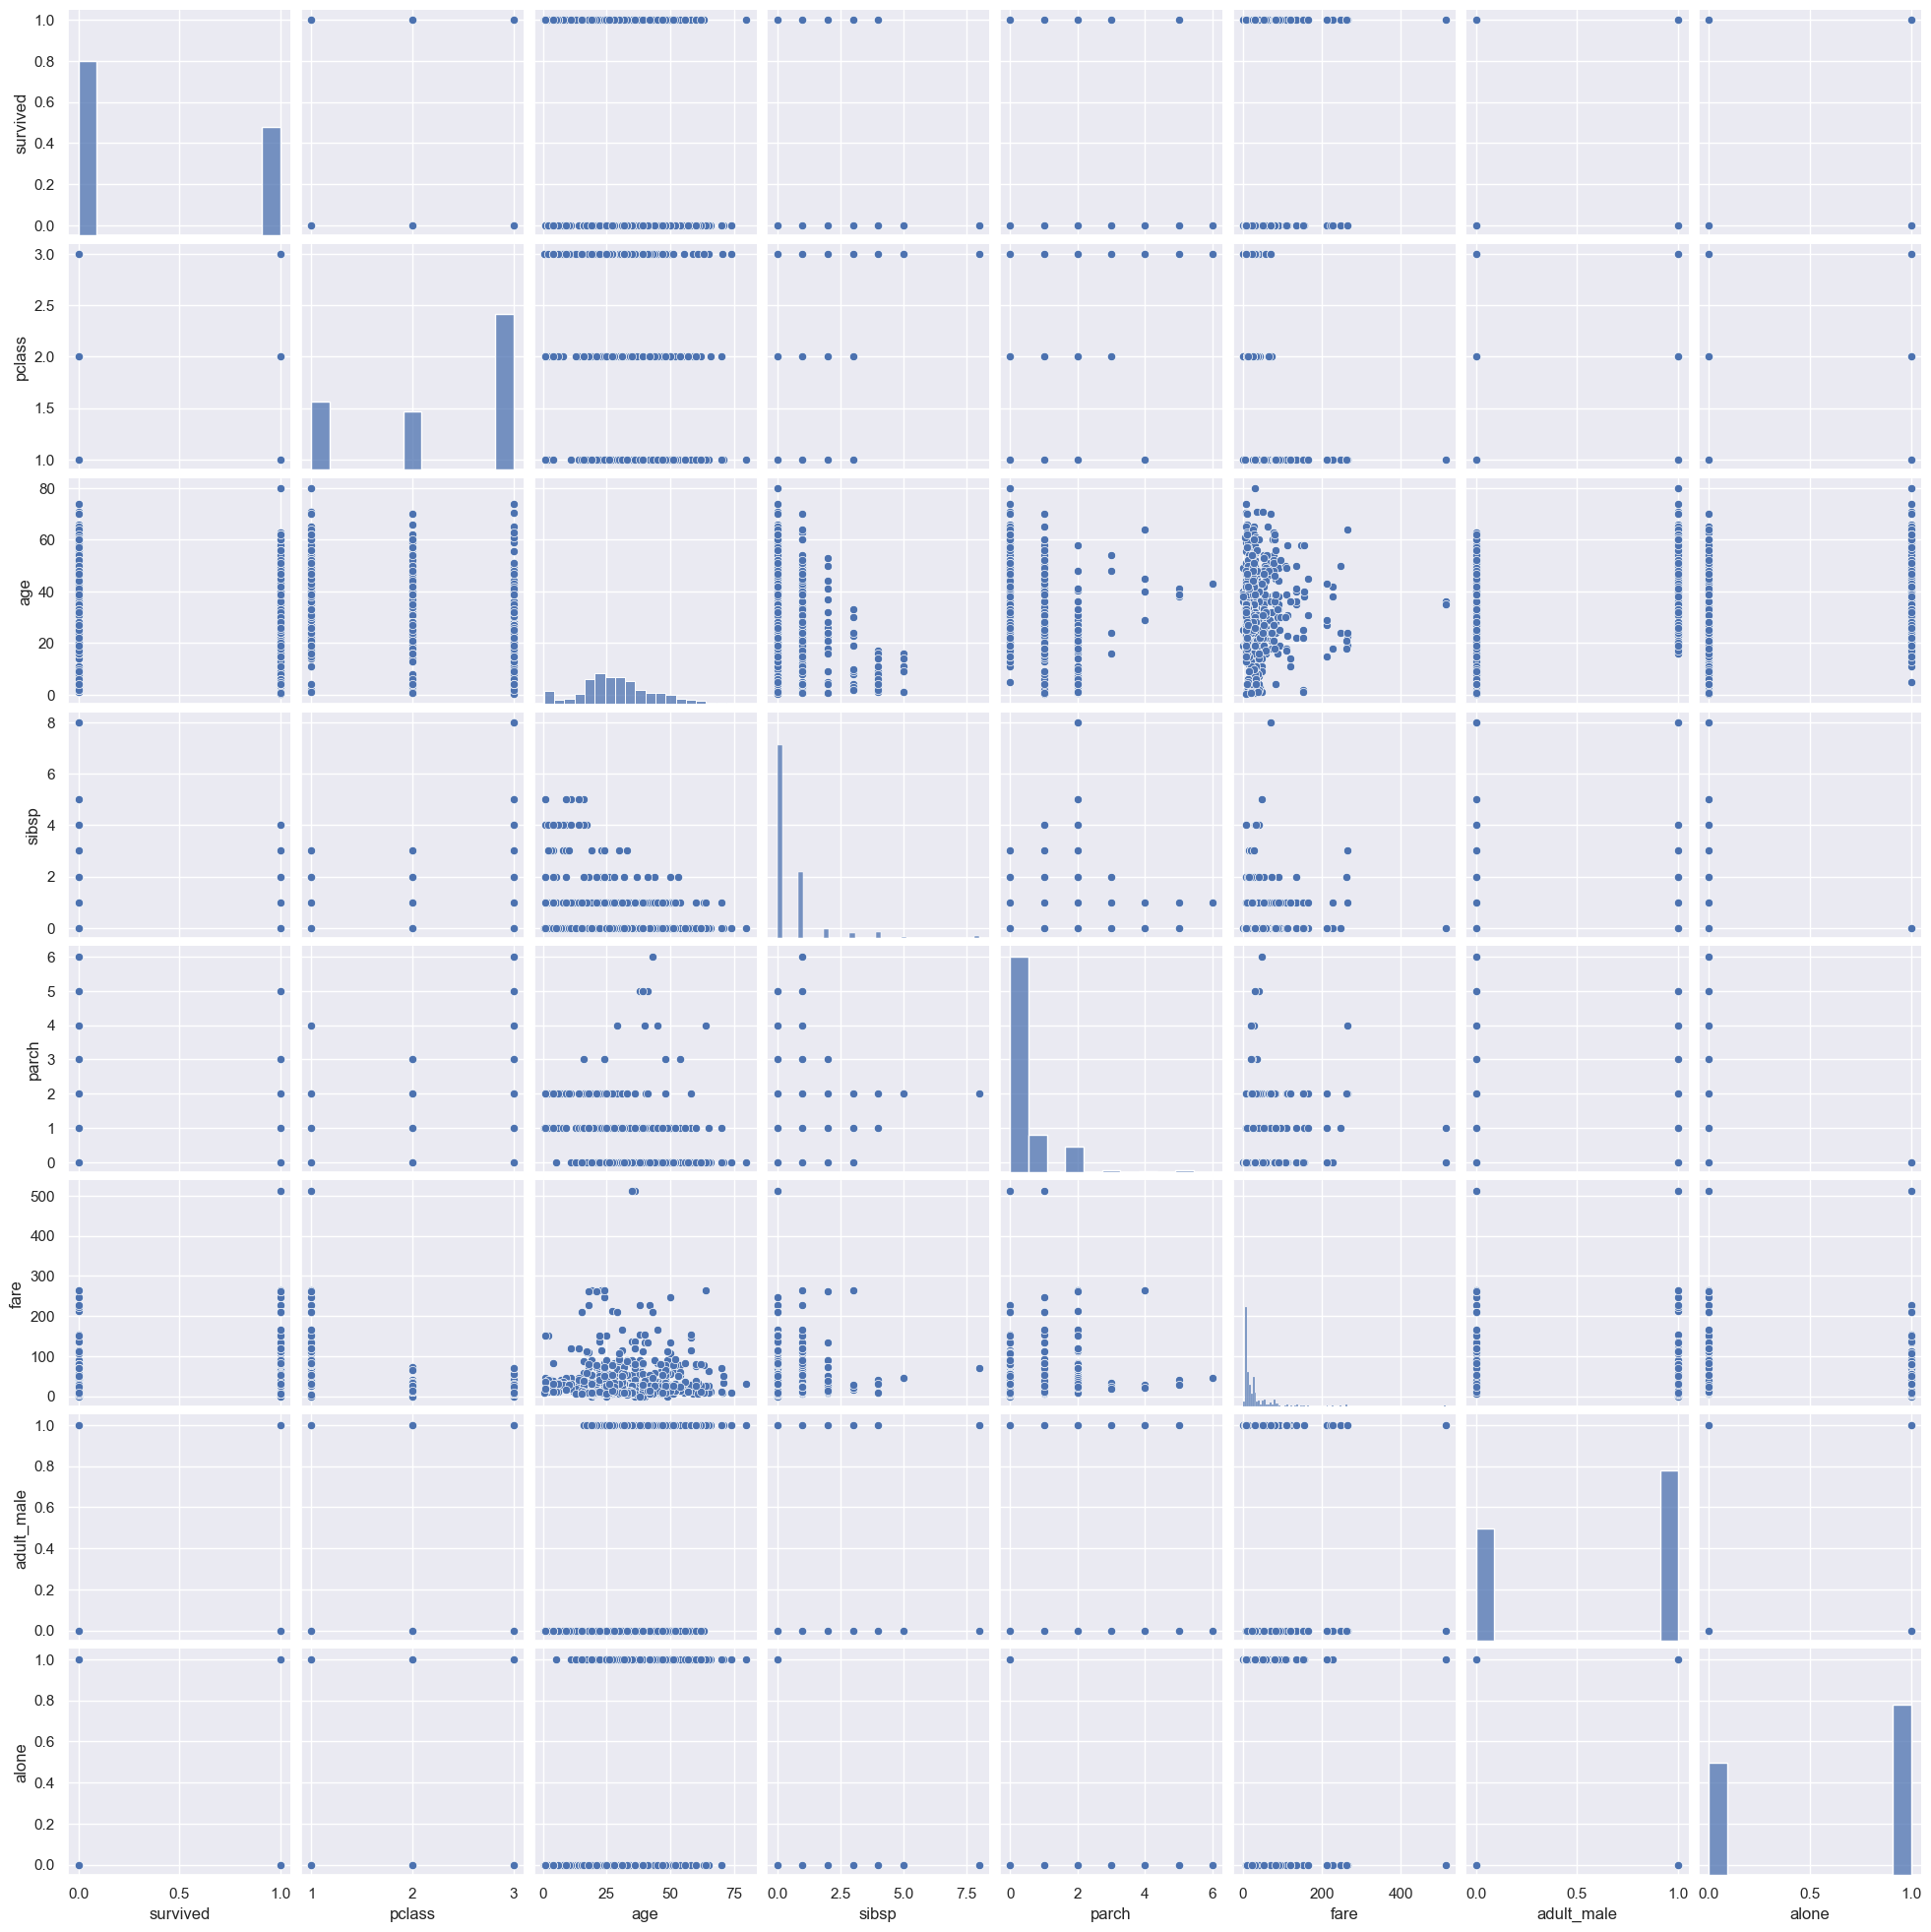

In [50]:
dfTitanic = sns.load_dataset('titanic')
sns.pairplot(dfTitanic)